Importing Libraries

In [1]:
import numpy as np
import pandas as pd

Import Dataset

In [2]:
data_df = pd.read_csv("CCPP Dataset.csv")

In [3]:
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Analysing the Dataset

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
data_df.shape

(9568, 5)

In [6]:
data_df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


Visualizing the data

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

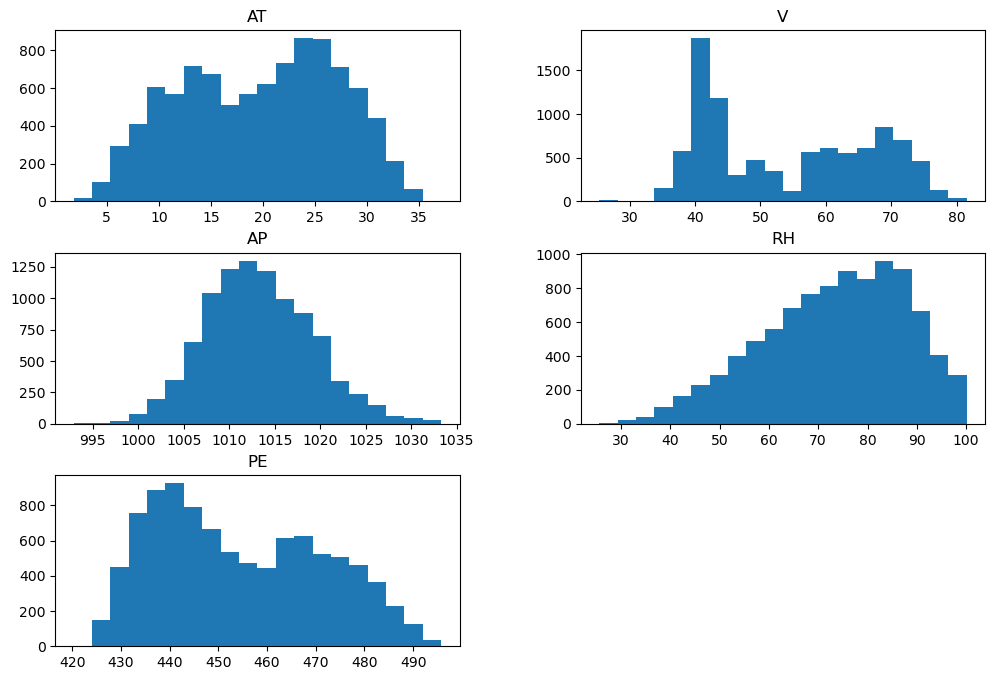

In [8]:
data_df.hist(bins=20, figsize=(12, 8), grid=False)
plt.show()

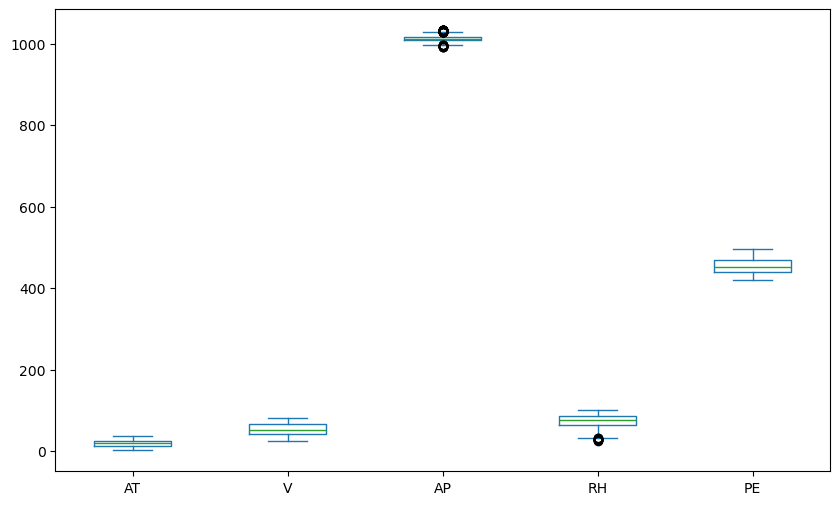

In [9]:
data_df.plot(kind='box', figsize=(10, 6))
plt.show()

C:\Users\adhic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adhic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adhic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adhic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

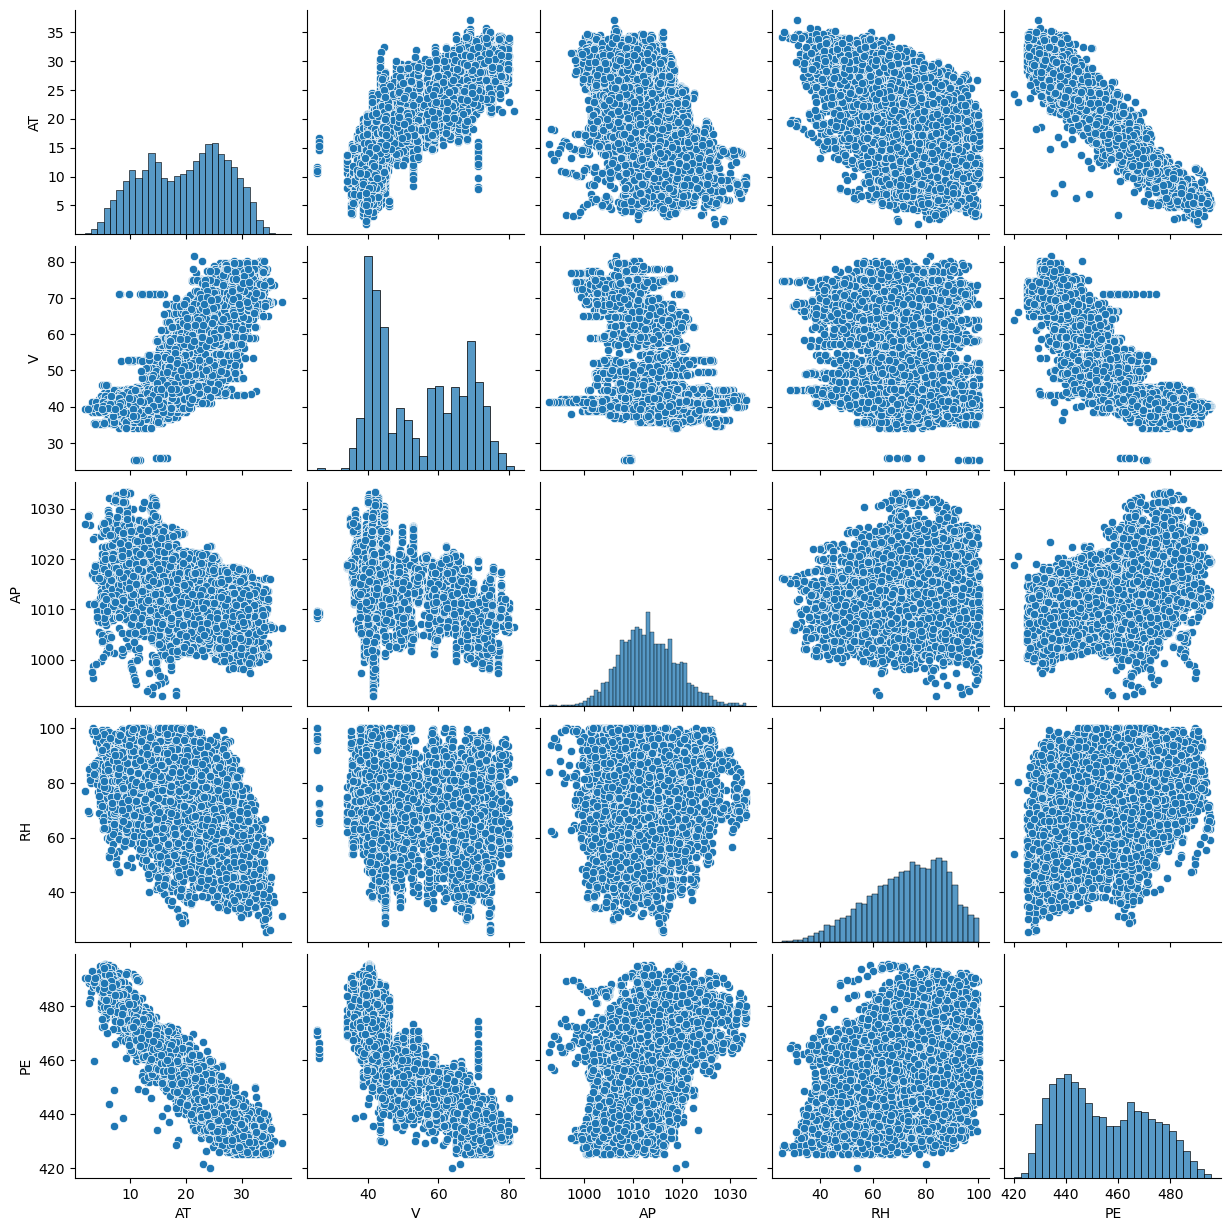

In [10]:
sns.pairplot(data_df)
plt.show()

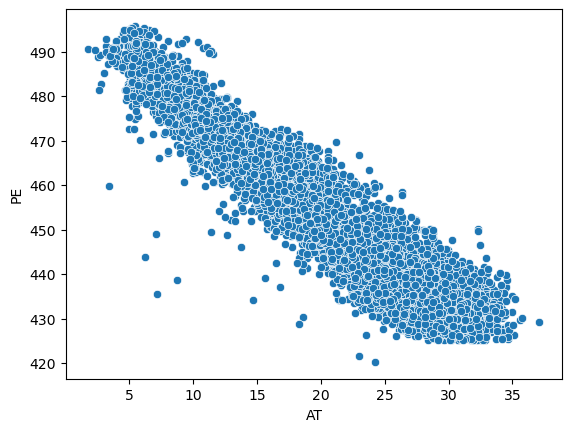

In [12]:
sns.scatterplot(x='AT', y='PE', data=data_df)
plt.show()

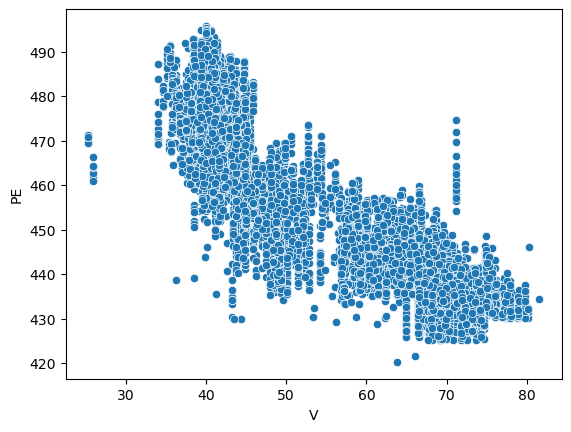

In [13]:
sns.scatterplot(x='V', y='PE', data=data_df)
plt.show()

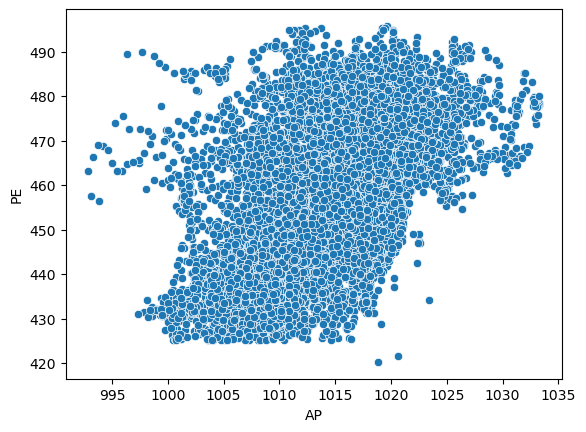

In [14]:
sns.scatterplot(x='AP', y='PE', data=data_df)
plt.show()

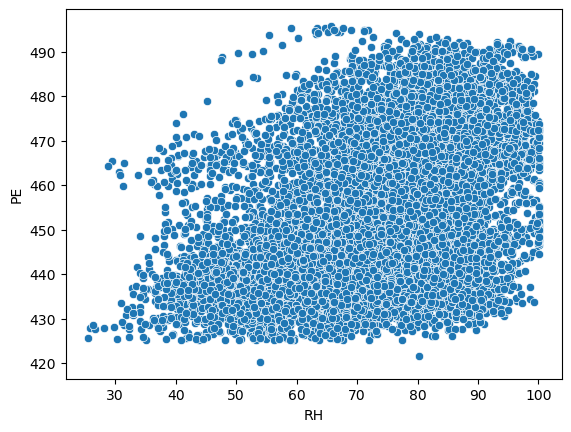

In [15]:
sns.scatterplot(x='RH', y='PE', data=data_df)
plt.show()

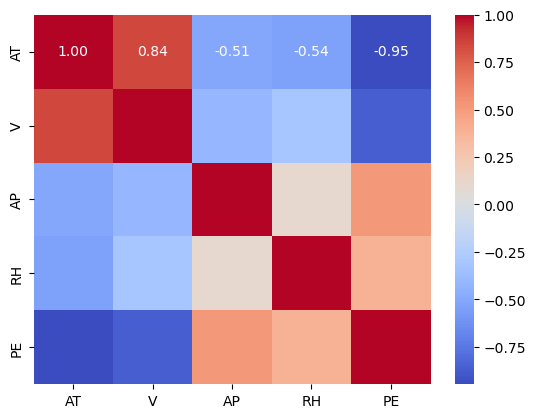

In [16]:
corr = data_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Splitting X and Y

In [17]:
X = data_df.drop(['PE'], axis = 1).values
Y = data_df['PE'].values

In [18]:
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [19]:
Y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

 Splitting the Data into Training Data and Testing Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

 Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
ml = LinearRegression()
ml.fit(X_train, Y_train)

LinearRegression()

Predicting The result

In [25]:
Y_pred = ml.predict(X_test)
Y_pred

array([431.40245096, 458.61474119, 462.81967423, ..., 432.47380825,
       436.16417243, 439.00714594])

In [26]:
ml.predict([[14.96, 41.76, 1024.07, 73.17]])

array([467.34820092])

Evaluate the Model

In [27]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9304112159477682

Plot the Results

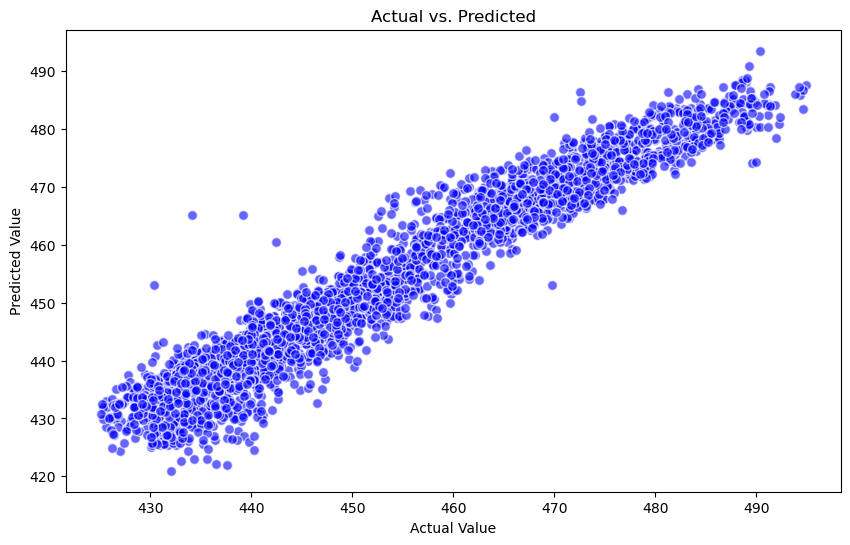

In [34]:
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.scatter(Y_test, Y_pred, color='b', alpha=0.6, edgecolors='w', s=50)  # Scatter plot 
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs. Predicted")
plt.show()  # Show the plot

Predicted Values

In [36]:
pred_y_df = pd.DataFrame({'Actual Value':Y_test, 'Predicted Value': Y_pred, 'Difference' : Y_test-Y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
5,432.68,429.676856,3.003144
6,477.50,473.017115,4.482885
7,459.68,456.532373,3.147627
8,477.50,474.342524,3.157476
9,444.99,446.364396,-1.374396
